In [32]:
#leaf  data from kaggle
#kaggle api download

In [33]:
#upload json file here
#initialize all the random functions to 0
import random
import numpy as np
import tensorflow as tf
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

In [34]:
import json
import os
from zipfile import ZipFile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,models
from tensorflow import keras

In [35]:
#setup kaggle api to collab
shashi = json.load(open("/content/kaggle.json"))

In [36]:
os.environ['KAGGLE_USERNAME'] = shashi['username']
os.environ['KAGGLE_KEY'] = shashi['key']

In [37]:
#above data for setting an environment kaggle to colab
import kaggle

In [38]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
plantvillage-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [40]:
ls

 drive/         'plantvillage dataset'/     shashi_classes.json
 kaggle.json     plantvillage-dataset.zip
 leaf_model.h5   sample_data/


In [41]:
#extract the zip file
f1 = ZipFile("plantvillage-dataset.zip")
f1.extractall()
f1.close()

In [42]:
base_dir = "plantvillage dataset/color"

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

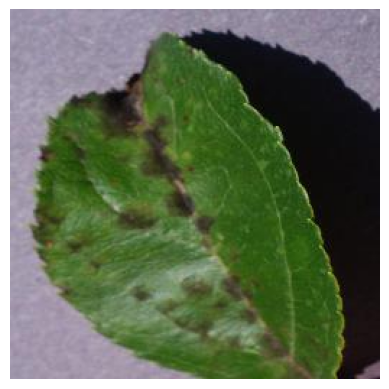

In [43]:
#setting the base directory to a color folder
ipath = "/content/plantvillage dataset/color/Apple___Apple_scab/0261a6e4-21f8-481a-8827-b674e6955644___FREC_Scab 3055.JPG"
img = mpimg.imread(ipath)
plt.imshow(img)
plt.axis("off")

In [44]:
img.shape

(256, 256, 3)

In [45]:
#make all the images uniform
img_size=224
batch_size=32
data_gen=ImageDataGenerator(rescale=1./255,validation_split=0.2)
#validation split is testing size

In [46]:
train_generator = data_gen.flow_from_directory(base_dir,target_size=[img_size,img_size],batch_size=batch_size,class_mode="categorical",subset="training")

Found 43456 images belonging to 38 classes.


In [47]:
validation_generator = data_gen.flow_from_directory(base_dir,target_size=[img_size,img_size],batch_size=batch_size,class_mode="categorical",subset="validation")

Found 10849 images belonging to 38 classes.


In [48]:
#making of neural network
model = keras.Sequential()
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(img_size,img_size,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation="relu"))
model.add(layers.Dense(train_generator.num_classes,activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 93312)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    23,888,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,908,038 (91.20 MB)

 Trainable params: 23,908,038 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
np.array([[1,2,3]]).flatten()

array([1, 2, 3])

In [51]:
#Pass the data to my network
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_generator,
          steps_per_epoch=train_generator.samples//batch_size,
          epochs=5,
          validation_data=validation_generator,
          validation_steps=validation_generator.samples//batch_size)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 117s 84ms/step - accuracy: 0.5477 - loss: 1.8005 - val_accuracy: 0.8243 - val_loss: 0.5678
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 123s 71ms/step - accuracy: 0.8798 - loss: 0.3816 - val_accuracy: 0.8617 - val_loss: 0.4400
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 134s 66ms/step - accuracy: 0.9459 - loss: 0.1685 - val_accuracy: 0.8779 - val_loss: 0.4327
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 146s 68ms/step - accuracy: 0.9692 - loss: 0.0943 - val_accuracy: 0.8603 - val_loss: 0.5664
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 139s 66ms/step - accuracy: 0.9772 - loss: 0.0691 - val_accuracy: 0.8616 - val_loss: 0.6277


In [54]:
model.save("leaf_model.h5")

In [55]:
#above line is for saving the model
#extract the classes from data with indexes
train_generator.class_indices.items()

dict_items([('Apple___Apple_scab', 0), ('Apple___Black_rot', 1), ('Apple___Cedar_apple_rust', 2), ('Apple___healthy', 3), ('Blueberry___healthy', 4), ('Cherry_(including_sour)___Powdery_mildew', 5), ('Cherry_(including_sour)___healthy', 6), ('Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 7), ('Corn_(maize)___Common_rust_', 8), ('Corn_(maize)___Northern_Leaf_Blight', 9), ('Corn_(maize)___healthy', 10), ('Grape___Black_rot', 11), ('Grape___Esca_(Black_Measles)', 12), ('Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 13), ('Grape___healthy', 14), ('Orange___Haunglongbing_(Citrus_greening)', 15), ('Peach___Bacterial_spot', 16), ('Peach___healthy', 17), ('Pepper,_bell___Bacterial_spot', 18), ('Pepper,_bell___healthy', 19), ('Potato___Early_blight', 20), ('Potato___Late_blight', 21), ('Potato___healthy', 22), ('Raspberry___healthy', 23), ('Soybean___healthy', 24), ('Squash___Powdery_mildew', 25), ('Strawberry___Leaf_scorch', 26), ('Strawberry___healthy', 27), ('Tomato___Bacterial_spot', 

In [56]:
shashi_classes = {v:k for k,v in train_generator.class_indices.items()}

In [57]:
#saving key as index and value as disease in the above cell
json.dump(shashi_classes,open("shashi_classes.json","w"))

In [58]:
ls

 drive/         'plantvillage dataset'/     shashi_classes.json
 kaggle.json     plantvillage-dataset.zip
 leaf_model.h5   sample_data/


In [59]:
def  load_preprocess_image(ipath,target_size=(224,224)):
  img = Image.open(ipath)
  img = img.resize(target_size)
  img_array = np.array(img)
  img_array = np.expand_dims(img_array,axis=0)
  img_array = img_array.astype("float32")/255.0
  return img_array

In [60]:
#Above cell is for resizing of image
def predict_leaf(model,ipath,class_indices):
  preprocess_img = load_preprocess_image(ipath)
  prediction=model.predict(preprocess_img)
  predicted_class_index=np.argmax(prediction,axis=1)[0]# [0] is top most prediction
  predicted_class=class_indices[predicted_class_index]
  return predicted_class
  #axis = 1 is pulling the data from the column 0,0 is top most

In [71]:
#get image path
i1 = "/content/plantvillage dataset/color/Apple___Black_rot/00e909aa-e3ae-4558-9961-336bb0f35db3___JR_FrgE.S 8593.JPG"
i2 = "/content/plantvillage dataset/color/Corn_(maize)___healthy/00031d74-076e-4aef-b040-e068cd3576eb___R.S_HL 8315 copy 2.jpg"

In [72]:
#apply the images to the model
predict_leaf(model,i2,shashi_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


'Corn_(maize)___healthy'

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
model.save("leaf_model.keras")